<a href="https://colab.research.google.com/github/Prasun1608/Computer-Vision-Projects/blob/main/Preprocessing_Image_(Landscape).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Image Segementation

#1) Region based segementation
#2) Edge based Segmentation
#3) Segmentation based on CLustering

#Two types of segmentation
#Semantic Seg= differnetatie persons from cars
#Instance Seg= Differntiate different persons from each other


In [ ]:
#One simple way to segment different objects could be to use their pixel values. 
#An important point to note – the pixel values will be different for the objects and the image’s background if there’s a sharp contrast between them.
#In this case, we can set a threshold value. 
#The pixel values falling below or above that threshold can be classified accordingly (as an object or the background). This technique is known as Threshold Segmentation.

In [ ]:
#If we want to divide the image into two regions (object and background), we define a single threshold value. This is known as the global threshold.
#If we have multiple objects along with the background, we must define multiple thresholds. These thresholds are collectively known as the local threshold.

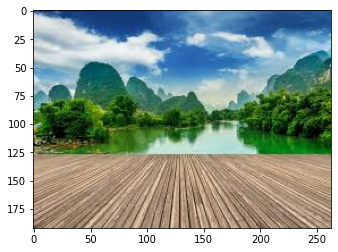

In [ ]:
import os
import matplotlib.pyplot as plt


img= plt.imread('/content/drive/MyDrive/1.jpeg')
img.shape

plt.imshow(img)

In [ ]:
import numpy as np
import cv2
%matplotlib inline
from scipy import ndimage   
#The scipy.ndimage packages provides a number of general image processing and analysis functions that are designed to operate with arrays of arbitrary dimensionality.

from skimage.color import rgb2gray, rgb2grey

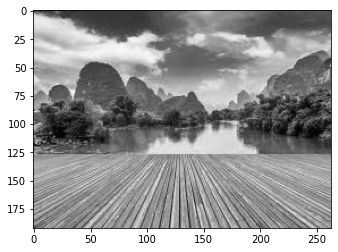

In [ ]:
gray= rgb2grey(img)

plt.imshow(gray, cmap='gray')

In [ ]:
gray.shape

(192, 263)

In [ ]:
# We will take the mean of the pixel values and use that as a threshold. 
#If the pixel value is more than our threshold, we can say that it belongs to an object. If the pixel value is less than the threshold, it will be treated as the background

In [ ]:
gray_r= gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(len(gray_r)):
  meang= np.mean(gray_r)
  if gray_r[i]>meang:
    gray_r[i]=1
  else:
    gray_r[i]=0

gray_r

array([0., 0., 0., ..., 0., 0., 1.])

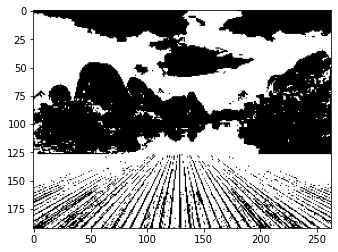

In [ ]:
plt.imshow(gray_r.reshape(gray.shape[0], gray.shape[1]), cmap='gray')
#The gray colormap maps 0 to black and 1 to white. The jet colormap maps 0 to blue and 1 to red. 

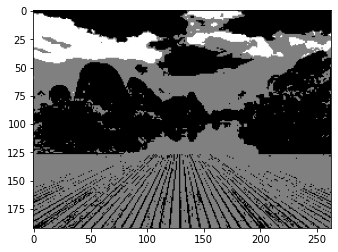

In [ ]:
gray= rgb2gray(img)
gray_r= gray.reshape(gray.shape[0]*gray.shape[1])

for i in range(len(gray_r)):
  meang= np.mean(gray_r)
  if gray_r[i]>= meang:
    gray_r[i]=3
  elif gray_r[i]>0.5:
    gray_r[i]=2
  else:
    gray_r[i]=1

gray_r= gray_r.reshape(gray.shape[0], gray.shape[1])
plt.imshow(gray_r, cmap='gray')

array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])

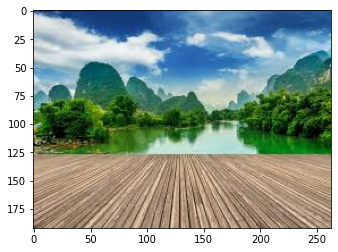

In [ ]:
plt.imshow(img)

# There is always an edge between two adjacent regions with different grayscale values (pixel values). 
#The edges can be considered as the discontinuous local features of an image.
#We can make use of this discontinuity to detect edges and hence define a boundary of the object.
#This helps us in detecting the shapes of multiple objects present in a given image.

#We define our horizontal and vertical filter as follows

filter_h= np.array([np.array([1,2,1]), np.array([0,0,0]), np.array([-1,-2,-1])])
filter_h

filter_v= filter_h.T
filter_v

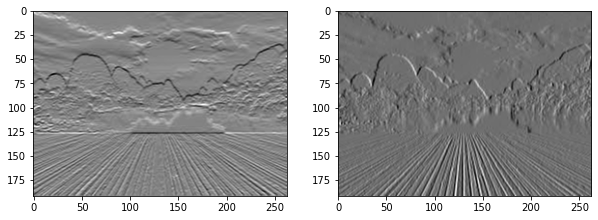

In [ ]:
#Now, convolve this filter over the image using the convolve function of the ndimage package from scipy.
gray= rgb2gray(img)

plt.figure(figsize=(10,10))


h_img= ndimage.convolve(gray, filter_h, mode='reflect')
plt.subplot(1,2,1)
plt.imshow(h_img, cmap='gray')


v_img= ndimage.convolve(gray, filter_v, mode='reflect')
plt.subplot(1,2,2)
plt.imshow(v_img, cmap='gray')


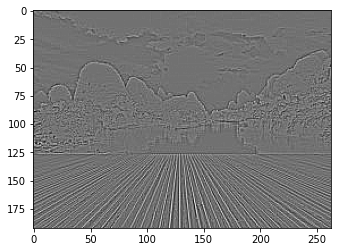

In [ ]:
#Here, we are able to identify the horizontal as well as the vertical edges.
#There is one more type of filter that can detect both horizontal and vertical edges at the same time.
#This is called the laplace operator

filter_l= np.array([np.array([1,1,1]), np.array([1,-8,1]), np.array([1,1,1])])

img_l= ndimage.convolve(gray, filter_l, mode='reflect')
plt.imshow(img_l, cmap='gray')

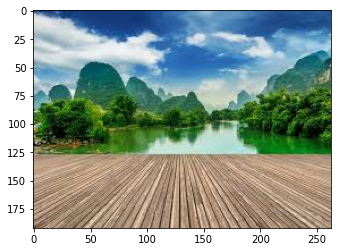

In [ ]:
pic= img/255.
plt.imshow(pic)

In [ ]:
pic_n= pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape

(50496, 3)

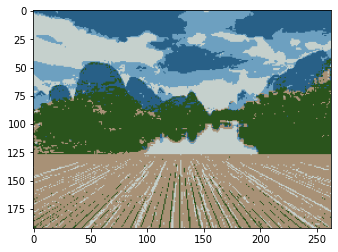

In [ ]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=5, random_state=0, max_iter=20)
model= kmeans.fit(pic_n)

pic2show= kmeans.cluster_centers_[kmeans.labels_]
cluster_img= pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])

plt.imshow(cluster_img)

In [ ]:
#Mask R CNN
#So, for a given image, Mask R-CNN, in addition to the class label and bounding box coordinates for each object, will also return the object mask.

#Steps for Fater R CNN
#Faster R-CNN first uses a ConvNet to extract feature maps from the images
#These feature maps are then passed through a Region Proposal Network (RPN) which returns the candidate bounding boxes
#We then apply an RoI pooling layer on these candidate bounding boxes to bring all the candidates to the same size
#And finally, the proposals are passed to a fully connected layer to classify and output the bounding boxes for objects

